In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
import pickle 


In [2]:
df = pd.read_excel('Data.xlsx')
df

,From,To,Distance(km),Fuel Price,Fuel Consumption,4 Seats,5 Seats,6 Seats,7 Seats,8 Seats,Fare (Nu)
0,Dagana,Dagapela,43.0,82.12,8.6,258,206,172,147,129,1032
1,Samtse,Sipsu,46.0,82.12,9.2,276,221,184,158,138,1104
2,Thimphu,Paro,50.0,82.12,10.0,300,240,200,171,150,1200
3,Samtse,Dorokha,51.0,82.12,10.2,306,245,204,175,153,1224
4,Lhuentse,Metsho,52.0,82.12,10.4,312,250,208,178,156,1248
...,...,...,...,...,...,...,...,...,...,...,...
579,Nganglam,Dechheling,23.0,82.12,4.6,150,120,100,85,75,598
580,Nganglam,Norbugang,25.0,82.12,5.0,163,130,108,93,81,650
581,Nganglam,Yangbari,31.0,82.12,6.2,202,161,134,115,101,806
582,Nganglam,Mikuri,40.0,82.12,8.0,260,208,173,149,130,1040


In [3]:
df.isna().sum()

From                0
To                  0
Distance(km)        0
Fuel Price          0
Fuel Consumption    0
4 Seats             0
5 Seats             0
6 Seats             0
7 Seats             0
8 Seats             0
Fare (Nu)           0
dtype: int64

In [4]:
df.dtypes

From                 object
To                   object
Distance(km)        float64
Fuel Price          float64
Fuel Consumption    float64
4 Seats               int64
5 Seats               int64
6 Seats               int64
7 Seats               int64
8 Seats               int64
Fare (Nu)             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   From              584 non-null    object 
 1   To                584 non-null    object 
 2   Distance(km)      584 non-null    float64
 3   Fuel Price        584 non-null    float64
 4   Fuel Consumption  584 non-null    float64
 5   4 Seats           584 non-null    int64  
 6   5 Seats           584 non-null    int64  
 7   6 Seats           584 non-null    int64  
 8   7 Seats           584 non-null    int64  
 9   8 Seats           584 non-null    int64  
 10  Fare (Nu)         584 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 50.3+ KB


In [6]:
df.describe()

,Distance(km),Fuel Price,Fuel Consumption,4 Seats,5 Seats,6 Seats,7 Seats,8 Seats,Fare (Nu)
count,584.000000,5.840000e+02,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,74.968322,8.212000e+01,14.993664,455.494863,364.321918,303.563356,260.217466,227.792808,1820.626712
std,125.637497,5.973676e-13,25.127499,752.211778,601.820873,501.515576,429.858853,376.083783,3009.514500
min,0.000000,8.212000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,8.212000e+01,1.150000,33.000000,29.750000,24.250000,21.250000,16.000000,130.000000
50%,15.000000,8.212000e+01,3.000000,98.000000,78.000000,65.000000,56.000000,49.000000,377.000000
75%,78.000000,8.212000e+01,15.600000,477.750000,382.250000,318.000000,272.750000,238.500000,1909.500000
max,750.000000,8.212000e+01,150.000000,4500.000000,3600.000000,3000.000000,2571.000000,2250.000000,18000.000000


In [7]:
ndf = df.select_dtypes(include = ['number'])
ndf.drop(['4 Seats', '5 Seats', '6 Seats', '7 Seats', '8 Seats'], axis = 1, inplace = True)

In [8]:
ndf

,Distance(km),Fuel Price,Fuel Consumption,Fare (Nu)
0,43.0,82.12,8.6,1032
1,46.0,82.12,9.2,1104
2,50.0,82.12,10.0,1200
3,51.0,82.12,10.2,1224
4,52.0,82.12,10.4,1248
...,...,...,...,...
579,23.0,82.12,4.6,598
580,25.0,82.12,5.0,650
581,31.0,82.12,6.2,806
582,40.0,82.12,8.0,1040


In [9]:
ndf.isna().sum()

Distance(km)        0
Fuel Price          0
Fuel Consumption    0
Fare (Nu)           0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


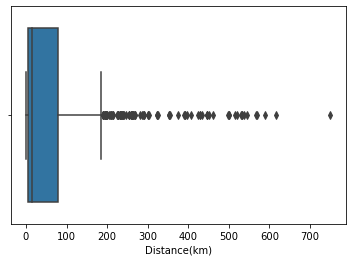

In [10]:
sns.boxplot(ndf['Distance(km)'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


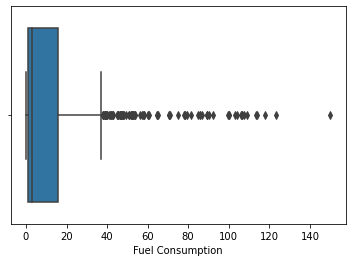

In [11]:
sns.boxplot(ndf['Fuel Consumption'])
plt.show()

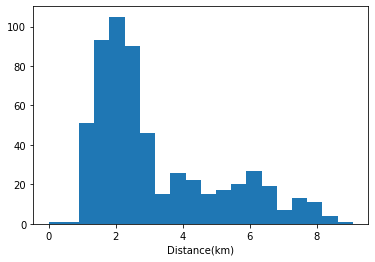

In [12]:
x = np.cbrt(ndf['Distance(km)'])
plt.hist(x, bins = 20)
plt.xlabel('Distance(km)')
plt.show()

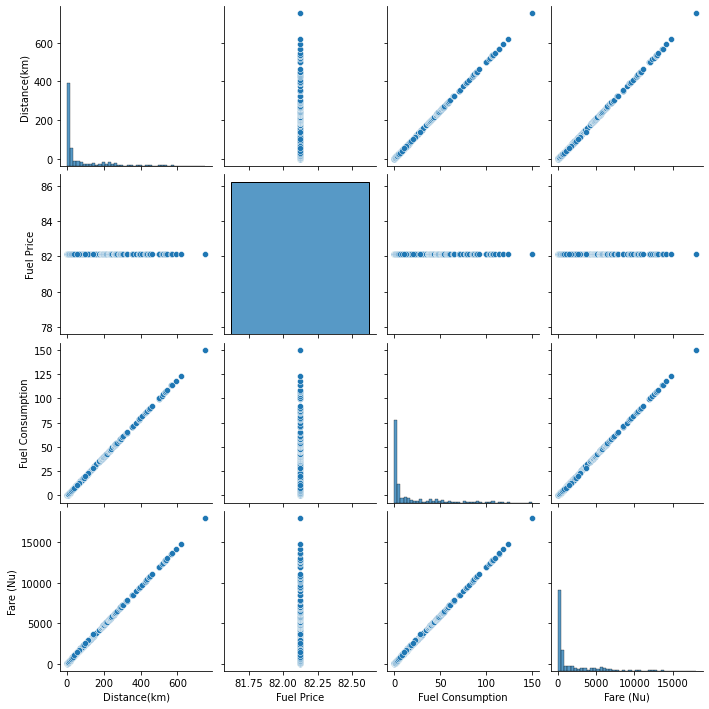

In [13]:
sns.pairplot(ndf)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
df['From'] = le.fit_transform(df.From)
df

,From,To,Distance(km),Fuel Price,Fuel Consumption,4 Seats,5 Seats,6 Seats,7 Seats,8 Seats,Fare (Nu)
0,3,Dagapela,43.0,82.12,8.6,258,206,172,147,129,1032
1,28,Sipsu,46.0,82.12,9.2,276,221,184,158,138,1104
2,35,Paro,50.0,82.12,10.0,300,240,200,171,150,1200
3,28,Dorokha,51.0,82.12,10.2,306,245,204,175,153,1224
4,14,Metsho,52.0,82.12,10.4,312,250,208,178,156,1248
...,...,...,...,...,...,...,...,...,...,...,...
579,17,Dechheling,23.0,82.12,4.6,150,120,100,85,75,598
580,17,Norbugang,25.0,82.12,5.0,163,130,108,93,81,650
581,17,Yangbari,31.0,82.12,6.2,202,161,134,115,101,806
582,17,Mikuri,40.0,82.12,8.0,260,208,173,149,130,1040


In [15]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
df['To'] = le.fit_transform(df.To)
df

,From,To,Distance(km),Fuel Price,Fuel Consumption,4 Seats,5 Seats,6 Seats,7 Seats,8 Seats,Fare (Nu)
0,3,66,43.0,82.12,8.6,258,206,172,147,129,1032
1,28,357,46.0,82.12,9.2,276,221,184,158,138,1104
2,35,281,50.0,82.12,10.0,300,240,200,171,150,1200
3,28,85,51.0,82.12,10.2,306,245,204,175,153,1224
4,14,234,52.0,82.12,10.4,312,250,208,178,156,1248
...,...,...,...,...,...,...,...,...,...,...,...
579,17,80,23.0,82.12,4.6,150,120,100,85,75,598
580,17,269,25.0,82.12,5.0,163,130,108,93,81,650
581,17,429,31.0,82.12,6.2,202,161,134,115,101,806
582,17,235,40.0,82.12,8.0,260,208,173,149,130,1040


Text(0, 0.5, 'Fare (Nu)')

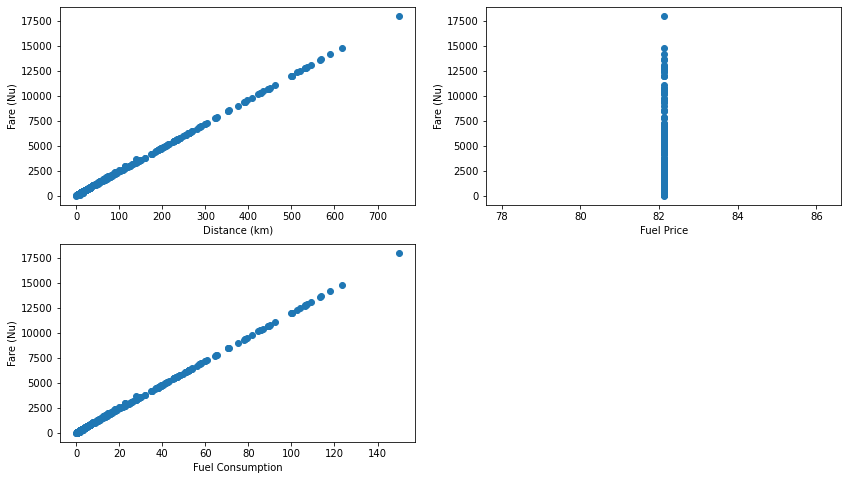

In [16]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.scatter(x=df["Distance(km)"], y=df["Fare (Nu)"])
plt.xlabel("Distance (km)")
plt.ylabel("Fare (Nu)")

plt.subplot(2, 2, 2)
plt.scatter(x=df["Fuel Price"], y=df["Fare (Nu)"])
plt.xlabel("Fuel Price")
plt.ylabel("Fare (Nu)")

plt.subplot(2, 2, 3)
plt.scatter(x=df["Fuel Consumption"], y=df["Fare (Nu)"])
plt.xlabel("Fuel Consumption")
plt.ylabel("Fare (Nu)")

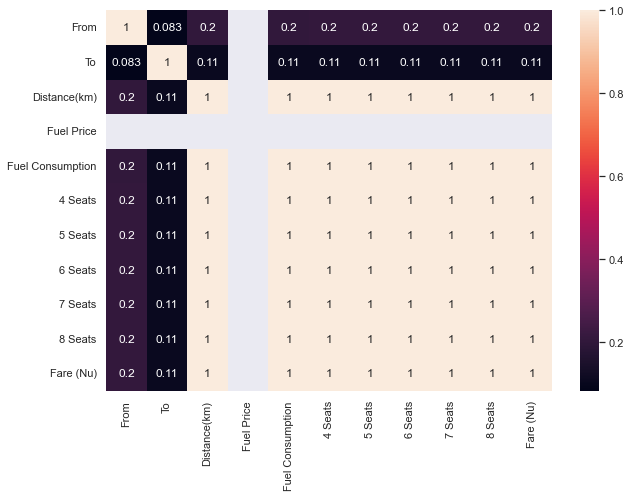

In [17]:
corr = df.corr()
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(data= corr,annot=True)
plt.show()

In [18]:
df.corr()['Fare (Nu)'].sort_values()

To                  0.105203
From                0.204913
Distance(km)        0.999930
Fuel Consumption    0.999930
8 Seats             0.999994
6 Seats             0.999995
4 Seats             0.999995
7 Seats             0.999995
5 Seats             0.999995
Fare (Nu)           1.000000
Fuel Price               NaN
Name: Fare (Nu), dtype: float64

In [19]:
arg = ["From","To","km","fuel_price", "fuel_consumption"]

In [20]:
from sklearn.model_selection import train_test_split
X = df.iloc[: , 0:5 ]
Y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 5)

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knnr = KNeighborsRegressor(n_neighbors = 10)
knnr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [22]:
y_pred = knnr.predict(X_test) 

In [23]:
trainscore = []
testscore = []
for k in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn.score(X_train,y_train)
    knn.score(X_test,y_test)
    trainscore.append(knn.score(X_train, y_train))
    testscore.append(knn.score(X_test, y_test))

In [24]:
knn.score(X_train, y_train)

0.9139798584321616

In [25]:
knn.score(X_test, y_test)

0.9304907066186039

In [26]:
knnrg = KNeighborsRegressor(n_neighbors = 10)
knnrg.fit(X_train,y_train)
y_pred = knnrg.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
MSE

59512.68772727274

In [27]:
from sklearn.metrics import r2_score
knnrg_r2 = r2_score(y_test, y_pred)
print("Knn R-squared: {}".format(knnrg_r2))

Knn R-squared: 0.9928082627380084


In [28]:
y = np.array([2,2,30,92.01,2.4])
np = y.reshape(-1,5)
knn.predict(np)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([334.1025641])

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
regressor.score(X_train,y_train)

0.9998741059304139

In [32]:
regressor.score(X_test,y_test)

0.9998374323549128

In [33]:
from sklearn.metrics import r2_score
multir_r2 = r2_score(y_test, y_pred)

print("Multiple Regression R-squared: {}".format(multir_r2))

Multiple Regression R-squared: 0.9998374323549128


In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error

multi_mse = mean_squared_error(y_pred, y_test)
multi_rmse = np.sqrt(multi_mse)
print("Multiple Regression RMSE: {}".format(multi_rmse))

Multiple Regression RMSE: 36.677939783441815


In [35]:
import numpy as numpy
y = numpy.array([2,2,30,92.01,2.4])
mp = y.reshape(-1,len(arg))
ypredict = regressor.predict(mp)
ypredict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([719.6930538])

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion="gini", max_depth = 25)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=25)

In [37]:
ypred = dtmodel.predict(X_test)

In [38]:
dtmodel.score(X_train,y_train)

0.9411764705882353

In [39]:
dtmodel.score(X_test,y_test)

0.6931818181818182

In [40]:
from sklearn.metrics import mean_squared_error

decision_mse = mean_squared_error(y_pred, y_test)
print("Decision Tree RMSE: {}".format(decision_mse))

Decision Tree RMSE: 1345.2712667577837


In [41]:
from sklearn.metrics import r2_score
decision_r2 = r2_score(y_test, y_pred)

print("Decision Tree R-squared: {}".format(decision_r2))

Decision Tree R-squared: 0.9998374323549128


In [42]:

y = numpy.array([2,2,30,92.01,2.4])
mp = y.reshape(-1,len(arg))
ypredict = dtmodel.predict(mp)
ypredict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([390], dtype=int64)

In [43]:
data = {"Model": ["Multiple Regression","KNN","Decision Tree"], 
        "R-squared": [multir_r2,knnrg_r2,decision_r2]}          

results = pd.DataFrame(data=data)
results

,Model,R-squared
0,Multiple Regression,0.999837
1,KNN,0.992808
2,Decision Tree,0.999837


In [44]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['Distance(km)', 'Fuel Price', 'Fuel Consumption'], dtype='object')


In [45]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')


In [58]:
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean'))
                           
                       ])

In [59]:
c_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('labelencode',LabelEncoder())
                       ])

In [60]:
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',n_transformer,numeric_cols),
                           ('categoric',c_transformer,categorical_cols)
                       ])

In [102]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='kd_tree')

In [103]:
taximodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [104]:
set_config(display='diagram')
taximodel.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer())]),
                                                  Index(['Distance(km)', 'Fuel Price', 'Fuel Consumption'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('labelencode',
                                                                   LabelEncoder())]),
                                                  Index([], dtype='object'))])),
                ('est',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10,
                                      weights='distance'))])

In [105]:
y_hat = taximodel.predict(X_test)

In [106]:
report = classification_report(y_test, y_hat)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

          13       0.00      0.00      0.00         1
          26       0.86      1.00      0.92         6
          39       1.00      1.00      1.00         1
          52       1.00      1.00      1.00         9
          78       1.00      1.00      1.00        12
         104       1.00      1.00      1.00         8
         130       1.00      0.80      0.89        10
         156       0.75      1.00      0.86         6
         182       1.00      1.00      1.00        11
         208       1.00      1.00      1.00         6
         234       1.00      1.00      1.00         3
         260       1.00      1.00      1.00         6
         286       1.00      1.00      1.00         3
         312       1.00      1.00      1.00         3
         338       1.00      1.00      1.00         3
         364       1.00      1.00      1.00         2
         390       1.00      1.00      1.00         2
         416     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [107]:
pickle.dump(taximodel,open("taximodel.pkl","wb"))

In [108]:
model = pickle.load(open("taximodel.pkl","rb"))

In [109]:
model.score(X_test,y_test)

0.7329545454545454

In [110]:
model.score(X_train,y_train)

0.9583333333333334

In [146]:
from sklearn.model_selection import GridSearchCV

n_neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
algorithm = ['kd_tree']
weights = ['distance', 'uniform']
metric = ['minkowski','euclidean','manhattan']


# Pack these params into a dictionary

grid_params = [
  {
        "est__weights":weights,
          "est__algorithm": algorithm,
        "est__n_neighbors":n_neighbors,
          "est__metric": metric
  }
]

taxi_dtree_pipeline = GridSearchCV(estimator=taximodel,
                               param_grid = grid_params,
                               scoring = 'accuracy',
                               cv = 10
                               )

In [147]:
taxi_model = taxi_dtree_pipeline.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [148]:
estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [149]:
taxi_model.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer())]),
                                                  Index(['Distance(km)', 'Fuel Price', 'Fuel Consumption'], dtype='object')),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('labelencode',
                                                                   LabelEncoder())]),
                                                  Index([], dtype='object'))])),
                ('est',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3,
                                      weights='distance'))])

In [150]:
y_predi = taxi_model.best_estimator_.predict(X_test)
print(y_predi)

[  312   104   182   104   520   182   312  7200   130 10320   364  4200
  2736   260    78    52  3336    52   416  2592   390   416   234   234
   104   104 12024   156    26  3504   338   520  1040  6312   364  2448
    26  3504   598    52   286  6864   312   182    78 12888   416  1404
   208    52  4728  5472 10728   208   182  5016   468   260   702   156
   806  9408   208    78    52   260   260  4680   182   182  1040  6072
   520  2040   624  1768   156   156   468  8448   468    78   156    26
    78  3504   442    78  1508    52  4440    26   572  2976    78  3336
  1512   208   702   104  8448   442   286   520  1200   494   130  3504
  1032   806   182    26  1430 10320   338    26  1326   390   416   156
    78    26   260   182   104   104   234    39   156  4800   416   572
    78   182 13608   130   650   130    52   182    78   832  9408   130
    52  5664   338   286    78  2736   442  1872    78   130   494  3408
   260   130   156    52   208  3552  5568   208   

In [151]:
report = classification_report(y_test, y_predi)
print("Report : \n{}".format(report))

Report : 
              precision    recall  f1-score   support

          13       0.00      0.00      0.00         1
          26       0.86      1.00      0.92         6
          39       1.00      1.00      1.00         1
          52       1.00      1.00      1.00         9
          78       1.00      1.00      1.00        12
         104       1.00      1.00      1.00         8
         130       1.00      0.80      0.89        10
         156       0.75      1.00      0.86         6
         182       1.00      1.00      1.00        11
         208       1.00      1.00      1.00         6
         234       1.00      1.00      1.00         3
         260       1.00      1.00      1.00         6
         286       1.00      1.00      1.00         3
         312       1.00      1.00      1.00         3
         338       1.00      1.00      1.00         3
         364       1.00      1.00      1.00         2
         390       1.00      1.00      1.00         2
         416     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

<AxesSubplot:>

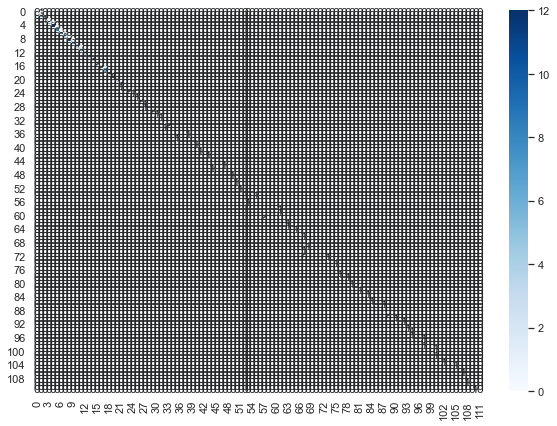

In [152]:
cm = confusion_matrix(y_test, y_predi)

sns.heatmap(cm,annot=True,cmap='Blues')

In [153]:
pickle.dump(taxi_model.best_estimator_,open("taxi_model.pkl",'wb'))

In [154]:
taximodel1 = pickle.load(open("taxi_model.pkl",'rb'))

In [155]:
samp = X_test.iloc[0:1,:]
samp

,From,To,Distance(km),Fuel Price,Fuel Consumption
281,2,38,12.0,82.12,2.4


In [156]:
model.predict(samp)[0]

312

In [157]:
taximodel1.predict(samp)

array([312], dtype=int64)

In [158]:
taximodel1.score(X_train,y_train)

0.9583333333333334

In [159]:
taximodel1.score(X_test,y_test)

0.7329545454545454